In [18]:
# Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
#Upload CSV file
from google.colab import files
upload_file = files.upload()

Saving heart.csv to heart.csv


In [3]:
# Read the CSV file and show the top 5 rows using .head()
heart_df = pd.read_csv("heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
print(heart_df.shape)

(303, 14)


The dataset consists of 303 rows and 14 features/columns.

In [16]:
print(heart_df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


There are no null values in any column.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


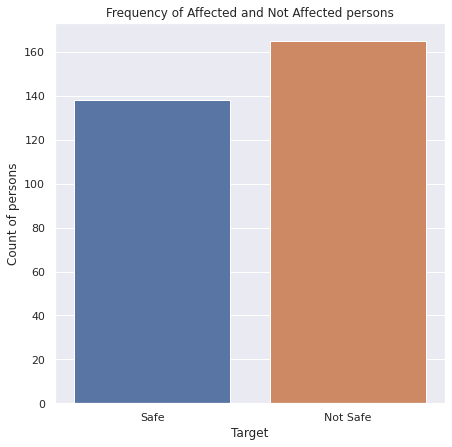

In [90]:
plt.figure(figsize = (7,7))
sns.countplot('target', data = heart_df)
plt.xlabel("Target")
plt.ylabel("Count of persons")
plt.xticks([0,1],['Safe', 'Not Safe'])
plt.title("Frequency of Affected and Not Affected persons")
plt.show()

A distribution to show the number of persons having a risk of Heart Disease and Not Having the risk of Heart Disease.

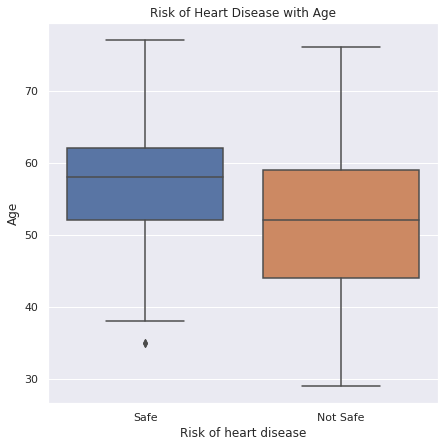

In [91]:
plt.figure(figsize = (7,7))
sns.boxplot(x = 'target',y= 'age', data = heart_df)
plt.xticks([0,1],['Safe', 'Not Safe'])
plt.xlabel("Risk of heart disease")
plt.ylabel("Age")
plt.title("Risk of Heart Disease with Age")
plt.show()

The distribution shows that persons having heart disease belong to age group 40 to 60. 

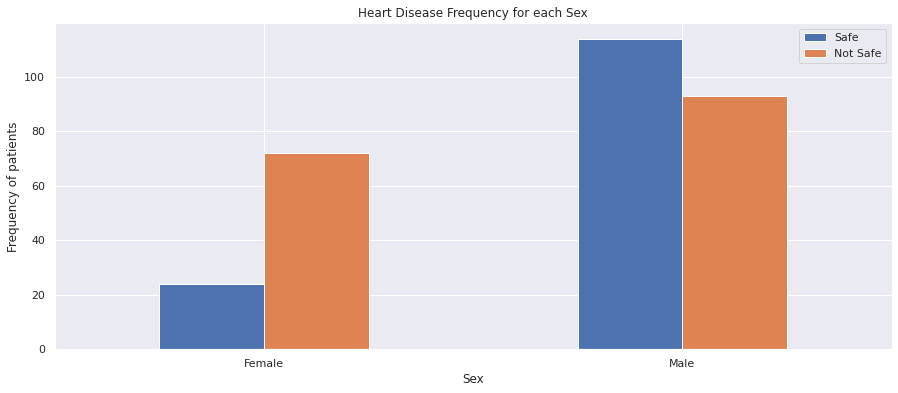

In [100]:
pd.crosstab(heart_df.sex,heart_df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for each Sex')
plt.xlabel('Sex')
plt.xticks([0,1],['Female','Male'],rotation=0)
plt.legend(["Safe", "Not Safe"])
plt.ylabel('Frequency of patients')
plt.show()

This distribution shows that females have a higher tendancy to have heart disease as compared to male.

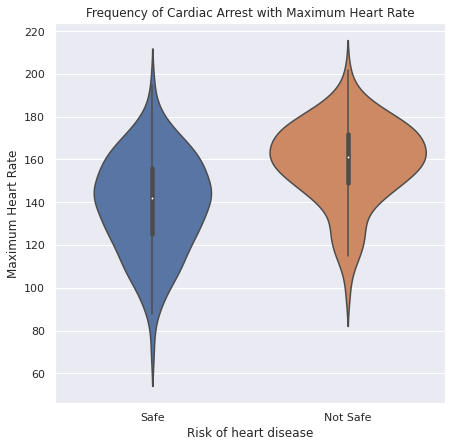

In [93]:
plt.figure(figsize = (7,7))
sns.violinplot(y ='thalach',x= 'target', data = heart_df)
plt.xticks([0,1],['Safe', 'Not Safe'])
plt.xlabel("Risk of heart disease")
plt.ylabel("Maximum Heart Rate")
plt.title("Frequency of Cardiac Arrest with Maximum Heart Rate")
plt.show()

Patients with higher Heart Rate tends to have greater risk of cardiac arrest, than those with comparatively lower heart rate, which is obvious.

In [94]:
correlation_matrix = heart_df.corr()
print('Correlation Matrix: {}'.format(correlation_matrix))

Correlation Matrix:                age       sex        cp  ...        ca      thal    target
age       1.000000 -0.098447 -0.068653  ...  0.276326  0.068001 -0.225439
sex      -0.098447  1.000000 -0.049353  ...  0.118261  0.210041 -0.280937
cp       -0.068653 -0.049353  1.000000  ... -0.181053 -0.161736  0.433798
trestbps  0.279351 -0.056769  0.047608  ...  0.101389  0.062210 -0.144931
chol      0.213678 -0.197912 -0.076904  ...  0.070511  0.098803 -0.085239
fbs       0.121308  0.045032  0.094444  ...  0.137979 -0.032019 -0.028046
restecg  -0.116211 -0.058196  0.044421  ... -0.072042 -0.011981  0.137230
thalach  -0.398522 -0.044020  0.295762  ... -0.213177 -0.096439  0.421741
exang     0.096801  0.141664 -0.394280  ...  0.115739  0.206754 -0.436757
oldpeak   0.210013  0.096093 -0.149230  ...  0.222682  0.210244 -0.430696
slope    -0.168814 -0.030711  0.119717  ... -0.080155 -0.104764  0.345877
ca        0.276326  0.118261 -0.181053  ...  1.000000  0.151832 -0.391724
thal      0.068001

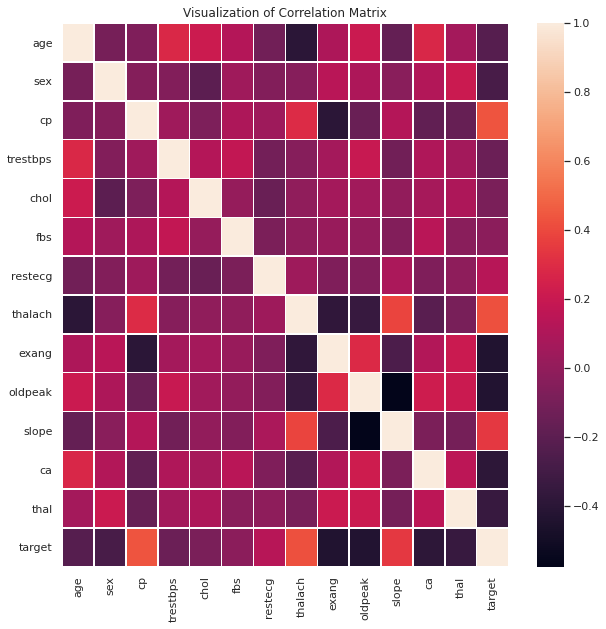

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=False, fmt='.1f',linewidths=0.5)
plt.title("Visualization of Correlation Matrix")
plt.show()


More lighter the color, greater is the correlation value and vice-versa.

In [75]:
#Seperating the dependent and independent cariables
X = heart_df.iloc[:,:-1].values
Y = heart_df.iloc[:,-1].values

In [135]:
#Pre-processing the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [136]:
#Splitting the training and testing data. Here, test data size is 30% of the entire dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 47)

In [88]:
# Random Forect Classifier Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150, criterion = "gini")
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy Score of Random Forest Classifier Model is {:.2f}%".format(accuracy_score(Y_test, classifier.predict(X_test))*100))

Accuracy Score of Random Forest Classifier Model is 82.42%


The Accuracy score of Random Forest Classifier Model is 82.42%

In [107]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2500)
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
print("Accuracy Score of Logistic Regression Model is {:.2f}%".format(accuracy_score(Y_test, model.predict(X_test))*100))

Accuracy Score of Logistic Regression Model is 83.52%


The Accuracy score of Logistic Regression Model is 83.52%

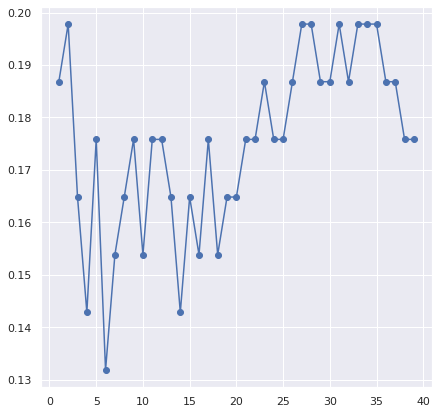

In [138]:
#KNN Model
plt.figure(figsize=(7,7))
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1,40):
  knn_classifier = KNeighborsClassifier(n_neighbors = i)
  knn_classifier.fit(X_train, Y_train)
  prediction = knn_classifier.predict(X_test)
  error.append(np.mean(prediction!=Y_test))
plt.plot(range(1,40), error, marker = 'o')

Here, the error is less when n_estimators = 6. So, we are using that value to tune our model.

In [139]:
knn_classifier = KNeighborsClassifier(n_neighbors = 6)
knn_classifier.fit(X_train, Y_train)
print("Accuracy Score of KNN Classifier Model is {:.2f}%".format(accuracy_score(Y_test, knn_classifier.predict(X_test))*100))

Accuracy Score of KNN Classifier Model is 86.81%


The Accuracy score of KNearest Neighbor Model is 86.81%

In [128]:
# Support Vector Machine(SVM) Classifier 
from sklearn.svm import SVC
svc = SVC(kernel = 'poly', degree = 3)
svc.fit(X_train, Y_train)
print("Accuracy Score of SVM Classifier Model is {:.2f}%".format(accuracy_score(Y_test, svc.predict(X_test))*100))

Accuracy Score of SVM Classifier Model is 82.42%


The Accuracy score of SVC Model is 82.42%

In [133]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier(criterion='gini', max_features='auto')
decisionTreeClassifier.fit(X_train, Y_train)
print("Accuracy Score of Decision Tree Classifier Model is {:.2f}%".format(accuracy_score(Y_test, decisionTreeClassifier.predict(X_test))*100))

Accuracy Score of SVM Classifier Model is 78.02%


Accuracy Score of SVM Classifier Model is 78.02%

Of all the models, the best accuracy score is observed in K-Neighbors Classifier with n_neighbors = 6.